<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#라이브러리-호출" data-toc-modified-id="라이브러리-호출-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>라이브러리 호출</a></span></li><li><span><a href="#parser-정의" data-toc-modified-id="parser-정의-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>parser 정의</a></span></li><li><span><a href="#utils.py-정의" data-toc-modified-id="utils.py-정의-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>utils.py 정의</a></span><ul class="toc-item"><li><span><a href="#데이터-불러와보기" data-toc-modified-id="데이터-불러와보기-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>데이터 불러와보기</a></span><ul class="toc-item"><li><span><a href="#_batchfy()-함수-적용" data-toc-modified-id="_batchfy()-함수-적용-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>_batchfy() 함수 적용</a></span></li><li><span><a href="#_split()-함수-적용" data-toc-modified-id="_split()-함수-적용-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>_split() 함수 적용</a></span></li></ul></li></ul></li><li><span><a href="#TPA_LSTM.py" data-toc-modified-id="TPA_LSTM.py-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>TPA_LSTM.py</a></span><ul class="toc-item"><li><span><a href="#model-확인" data-toc-modified-id="model-확인-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>model 확인</a></span></li></ul></li><li><span><a href="#main.py" data-toc-modified-id="main.py-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>main.py</a></span><ul class="toc-item"><li><span><a href="#evaluate" data-toc-modified-id="evaluate-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>evaluate</a></span></li><li><span><a href="#train" data-toc-modified-id="train-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>train</a></span><ul class="toc-item"><li><span><a href="#train()-함수-내의-output-shape-확인" data-toc-modified-id="train()-함수-내의-output-shape-확인-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>train() 함수 내의 output shape 확인</a></span></li></ul></li></ul></li><li><span><a href="#학습-및-결과" data-toc-modified-id="학습-및-결과-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>학습 및 결과</a></span></li><li><span><a href="#데이터-차원-수-확인" data-toc-modified-id="데이터-차원-수-확인-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>데이터 차원 수 확인</a></span><ul class="toc-item"><li><span><a href="#get_batches-풀어보기" data-toc-modified-id="get_batches-풀어보기-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>get_batches 풀어보기</a></span><ul class="toc-item"><li><span><a href="#get_batches의-경우-SEF_NET과-같은-구조를-가지고-있음" data-toc-modified-id="get_batches의-경우-SEF_NET과-같은-구조를-가지고-있음-7.1.1"><span class="toc-item-num">7.1.1&nbsp;&nbsp;</span>get_batches의 경우 SEF_NET과 같은 구조를 가지고 있음</a></span></li></ul></li><li><span><a href="#LSTM-layer" data-toc-modified-id="LSTM-layer-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>LSTM layer</a></span></li><li><span><a href="#Convolution-layer" data-toc-modified-id="Convolution-layer-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Convolution layer</a></span><ul class="toc-item"><li><span><a href="#수정전" data-toc-modified-id="수정전-7.3.1"><span class="toc-item-num">7.3.1&nbsp;&nbsp;</span>수정전</a></span></li><li><span><a href="#수정-후" data-toc-modified-id="수정-후-7.3.2"><span class="toc-item-num">7.3.2&nbsp;&nbsp;</span>수정 후</a></span></li></ul></li><li><span><a href="#Attention-layer" data-toc-modified-id="Attention-layer-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Attention layer</a></span><ul class="toc-item"><li><span><a href="#Calculate-the-attention-score" data-toc-modified-id="Calculate-the-attention-score-7.4.1"><span class="toc-item-num">7.4.1&nbsp;&nbsp;</span>Calculate the attention score</a></span></li><li><span><a href="#h't를-만들기-위해-matrix-multiplication을-진행하는-부분" data-toc-modified-id="h't를-만들기-위해-matrix-multiplication을-진행하는-부분-7.4.2"><span class="toc-item-num">7.4.2&nbsp;&nbsp;</span>h't를 만들기 위해 matrix multiplication을 진행하는 부분</a></span></li><li><span><a href="#tpa-lstm의-final-output" data-toc-modified-id="tpa-lstm의-final-output-7.4.3"><span class="toc-item-num">7.4.3&nbsp;&nbsp;</span>tpa-lstm의 final output</a></span></li></ul></li><li><span><a href="#AR-module" data-toc-modified-id="AR-module-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>AR module</a></span></li></ul></li></ul></div>

# 라이브러리 호출

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np;
from torch.autograd import Variable
import argparse
import math
import time

from models import TPA_LSTM_Modified
from utils import *
import importlib
# import torch.optim as optim

In [2]:
def normal_std(x):
    return x.std() * np.sqrt((len(x) - 1.) / (len(x)))

# parser 정의

In [3]:
parser = argparse.ArgumentParser(description='PyTorch Time series forecasting')
## data가 exchange_rate.txt로 되어있음
parser.add_argument('--data', type=str, default="data/exchange_rate.txt",help='location of the data file')
#, required=True
## model은 TPA_LSTM_Modified.py
parser.add_argument('--model', type=str, default='TPA_LSTM_Modified',help='')
parser.add_argument('--hidden_state_features', type=int, default=12, help='number of features in LSTMs hidden states')
parser.add_argument('--num_layers_lstm', type=int, default=1, help='num of lstm layers')
parser.add_argument('--hidden_state_features_uni_lstm', type=int, default=1, help='number of features in LSTMs hidden states for univariate time series')
parser.add_argument('--num_layers_uni_lstm', type=int, default=1, help='num of lstm layers for univariate time series')
parser.add_argument('--attention_size_uni_lstm', type=int, default=10, help='attention size for univariate lstm')
parser.add_argument('--hidCNN', type=int, default=10, help='number of CNN hidden units')
parser.add_argument('--hidRNN', type=int, default=100,help='number of RNN hidden units')
parser.add_argument('--window', type=int, default=24 * 7,help='window size')
parser.add_argument('--CNN_kernel', type=int, default=1,help='the kernel size of the CNN layers')
parser.add_argument('--highway_window', type=int, default=24,help='The window size of the highway component')
parser.add_argument('--clip', type=float, default=10.,help='gradient clipping')
parser.add_argument('--epochs', type=int, default=3000,help='upper epoch limit') #30
parser.add_argument('--batch_size', type=int, default=128, metavar='N',help='batch size')
parser.add_argument('--dropout', type=float, default=0.5,help='dropout applied to layers (0 = no dropout)')
parser.add_argument('--seed', type=int, default=54321,help='random seed')
parser.add_argument('--gpu', type=int, default=None)
parser.add_argument('--log_interval', type=int, default=2000, metavar='N',help='report interval')
parser.add_argument('--save', type=str, default='model/model.pt',help='path to save the final model')
parser.add_argument('--cuda', type=str, default=False)
parser.add_argument('--optim', type=str, default='adam')
parser.add_argument('--lr', type=float, default=1e-05)
parser.add_argument('--momentum', type=float, default=0.5)
parser.add_argument('--horizon', type=int, default=12)
parser.add_argument('--skip', type=float, default=24)
parser.add_argument('--hidSkip', type=int, default=5)
parser.add_argument('--L1Loss', type=bool, default=True)
parser.add_argument('--normalize', type=int, default=2)
parser.add_argument('--output_fun', type=str, default='sigmoid')
args = parser.parse_args([]) ## 주피터 노트북에서는 마지막 줄을 다음과 같이 바꿔야 함

# utils.py 정의

In [4]:
class Data_utility(object):
    # train and valid is the ratio of training set and validation set. test = 1 - train - valid
    def __init__(self, file_name, train, valid, cuda, horizon, window, normalize=2):
        self.cuda = cuda;
        self.window_length = window;
        self.horizon = horizon
        fin = open(file_name);
        self.original_data = np.loadtxt(fin, delimiter=','); # (7588, 8)
        self.normalized_data = np.zeros(self.original_data.shape);
        # self_original_rows : 7588
        # self_original_columns : 8
        self.original_rows, self.original_columns = self.normalized_data.shape;
        self.normalize = 2 # 정규화를 진행하는 게 디폴트
        self.scale = np.ones(self.original_columns); # 변수 개수만큼 1 생성 [1,1,1,1,1,1,1,1]
        self._normalized(normalize);

        # train, valid, test를 각 비율에 맞게 나누기
            # train은 train data의 비율, valid는 valid data의 비율을 의미
        self._split(int(train * self.original_rows), int((train + valid) * self.original_rows), self.original_rows);

        self.scale = torch.from_numpy(self.scale).float();# 변수 개수만큼 생성한 1을 float 형의 텐서로 전환
        # _split() 함수에 있는 self.test
        tmp = self.test[1] * self.scale.expand(self.test[1].size(0), self.original_columns);

        if self.cuda:
            self.scale = self.scale.cuda()
        self.scale = Variable(self.scale)

        #rse and rae must be some sort of errors for now, will come back to them later
        self.rse = normal_std(tmp);
        self.rae = torch.mean(torch.abs(tmp - torch.mean(tmp)));

    def _normalized(self, normalize):
        # normalized by the maximum value of entire matrix.
        if (normalize == 0):
            self.normalized_data = self.original_data
        if (normalize == 1):
            self.normalized_data = self.original_data / np.max(self.original_data);

        # normalized by the maximum value of each row(sensor).
        if (normalize == 2):
            for i in range(self.original_columns):
                self.scale[i] = np.max(np.abs(self.original_data[:, i]));
                self.normalized_data[:, i] = self.original_data[:, i] / np.max(np.abs(self.original_data[:, i]));

    def _split(self, train, valid, test):
        train_set = range(self.window_length + self.horizon - 1, train);
        valid_set = range(train, valid);
        test_set = range(valid, self.original_rows);
        self.train = self._batchify(train_set, self.horizon);
        self.valid = self._batchify(valid_set, self.horizon);
        self.test = self._batchify(test_set, self.horizon);

    def _batchify(self, idx_set, horizon):
        n = len(idx_set);
        X = torch.zeros((n, self.window_length, self.original_columns));
        Y = torch.zeros((n, self.original_columns));
        for i in range(n):
            end = idx_set[i] - self.horizon + 1;
            start = end - self.window_length;
            X[i, :, :] = torch.from_numpy(self.normalized_data[start:end, :]);
            Y[i, :] = torch.from_numpy(self.normalized_data[idx_set[i], :]);
        """
        Here matrix X is 3d matrix where each of it's 2d matrix is the separate window which has to be sent in for training.
        Y is validation."""
        return [X, Y];

    def get_batches(self, inputs, targets, batch_size, shuffle=True):
        length = len(inputs)
        if shuffle:
            index = torch.randperm(length)
        else:
            index = torch.LongTensor(range(length))
        start_idx = 0
        while (start_idx < length):
            end_idx = min(length, start_idx + batch_size)
            excerpt = index[start_idx:end_idx]
            X = inputs[excerpt];
            Y = targets[excerpt];
            if (self.cuda):
                X = X.cuda();
                Y = Y.cuda();
            yield Variable(X), Variable(Y);
            start_idx += batch_size

## 데이터 불러와보기

In [5]:
print('## args.data :', args.data)
print('## args.window :', args.window); self_window_length = args.window
print('## args.horizon :', args.horizon); self_horizon = args.horizon
print('## args.cuda :', args.cuda)

file_name = args.data
fin = open(file_name);
self_original_data = np.loadtxt(fin, delimiter=',');
self_original_data.shape

## args.data : data/exchange_rate.txt
## args.window : 168
## args.horizon : 12
## args.cuda : False


(7588, 8)

In [6]:
self_original_rows, self_original_columns = self_original_data.shape
print('## args.original_rows :', self_original_rows)
print('## args.original_cols :', self_original_columns)

## args.original_rows : 7588
## args.original_cols : 8


### _batchfy() 함수 적용

In [7]:
"""최종적인 batch 형태 [batch_size, window_size, n_features]로 만들어주는 게 아님
각 batch 별로 window size만큼의 데이터가 들어갈 수 있게 해주는 것"""
def _batchify(idx_set, horizon):
    n = len(idx_set); # idx_set은 데이터의 개수를 의미 -> trainset의 개수 or validset의 개수
    X = torch.zeros((n, self_window_length, self_original_columns)); # self_window_length=168, # self_original_columns = 8
    Y = torch.zeros((n, self_original_columns));
    for i in range(n):
        end = idx_set[i] - self_horizon + 1;
        start = end - self_window_length;
        X[i, :, :] = torch.from_numpy(self_normalized_data[start:end, :]);
        Y[i, :] = torch.from_numpy(self_normalized_data[idx_set[i], :]);
    """
    Here matrix X is 3d matrix where each of it's 2d matrix is the separate window which has to be sent in for training.
    And Y is validation."""
    return [X, Y];

In [8]:
"""연습할 때는 normalized data가 아닌 original data 사용"""
self_normalized_data = self_original_data.copy()

In [9]:
train = 0.6
tt = int(train * self_original_rows)
print('## _split()에서의 train :', tt)
train_set = range(self_window_length + self_horizon - 1, tt)
print('## train_set :', train_set)

## _split()에서의 train : 4552
## train_set : range(179, 4552)


In [10]:
idx_set = train_set
n = len(idx_set)
print('## len(idx_set) :', len(idx_set))

## len(idx_set) : 4373


In [11]:
"""8개의 변수에 대해 168의 window size로 4378개의 batch가 만들어짐
이후 32개 혹은 128개 등의 batch_size를 적용하기 위해서는 get_batches가 필요"""
X = torch.zeros((n, self_window_length, self_original_columns)); # self_window_length=168, # self_original_columns = 8
Y = torch.zeros((n, self_horizon, self_original_columns)); # multi-step 예측의 경우 Y값도 다음과 같아야 함
print('## X.shape :', X.shape)
print('## Y.shape :', Y.shape)

## X.shape : torch.Size([4373, 168, 8])
## Y.shape : torch.Size([4373, 12, 8])


In [12]:
## 첫번째 batchfy
i = 1
end = idx_set[i] - self_horizon + 1
start = end - self_window_length;
print('## end :', end)
print('## start :', start)

## end : 169
## start : 1


In [13]:
self_normalized_data.shape

(7588, 8)

In [14]:
self_normalized_data[start:end, :].shape

(168, 8)

In [15]:
idx_set[i]

180

In [16]:
self_normalized_data[end:idx_set[i]+1, :].shape

(12, 8)

In [17]:
end = idx_set[i] - self_horizon + 1; # 168
start = end - self_window_length; # 0
X[i, :, :] = torch.from_numpy(self_normalized_data[start:end, :]); # 0~168
Y[i, :] = torch.from_numpy(self_normalized_data[end:idx_set[i]+1, :]); # 179

In [18]:
X[0]

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [19]:
Y.shape

torch.Size([4373, 12, 8])

In [20]:
Y[0][0]

tensor([0., 0., 0., 0., 0., 0., 0., 0.])

In [21]:
## X[1] 값은 Y[0]의 첫 번째 행과 같다.
X[1]

tensor([[0.7818, 1.6100, 0.8611,  ..., 0.0069, 0.5940, 0.5240],
        [0.7867, 1.6293, 0.8610,  ..., 0.0070, 0.5973, 0.5263],
        [0.7860, 1.6370, 0.8621,  ..., 0.0070, 0.5970, 0.5238],
        ...,
        [0.8302, 1.9483, 0.8755,  ..., 0.0070, 0.6313, 0.5669],
        [0.8325, 1.9465, 0.8789,  ..., 0.0070, 0.6303, 0.5669],
        [0.8168, 1.9225, 0.8730,  ..., 0.0069, 0.6132, 0.5666]])

### _split() 함수 적용

In [17]:
## 비율 설정
train = 0.6
valid = 0.2
def _split(train, valid, test):
    train_set = range(self_window_length + self_horizon - 1, train);
    valid_set = range(train, valid);
    test_set = range(valid, self_original_rows); # self_original_rows=7588
    self_train = _batchify(train_set, self_horizon);
    self_valid = _batchify(valid_set, self_horizon);
    self_test = _batchify(test_set, self_horizon);
    return self_train, self_valid, self_test

In [18]:
self_scale = np.ones(self_original_columns); 
self_train, self_valid, self_test = _split(int(train * self_original_rows), int((train + valid) * self_original_rows), self_original_rows)
print('## _batchify를 거친 데이터는 X와 Y 두개를 가진 리스트 형태로 이루어져 있음:', len(self_train))
print('## self_train의 X:', self_train[0].shape, '/', '## self_train의 Y:', self_train[1].shape)
print('## self_valid의 X:', self_valid[0].shape, '/', '## self_valid의 Y:', self_valid[1].shape)
print('## self_test의 X:', self_test[0].shape, '/', '## self_test의 Y:', self_test[1].shape)

## _batchify를 거친 데이터는 X와 Y 두개를 가진 리스트 형태로 이루어져 있음: 2
## self_train의 X: torch.Size([4373, 168, 8]) / ## self_train의 Y: torch.Size([4373, 8])
## self_valid의 X: torch.Size([1518, 168, 8]) / ## self_valid의 Y: torch.Size([1518, 8])
## self_test의 X: torch.Size([1518, 168, 8]) / ## self_test의 Y: torch.Size([1518, 8])


In [19]:
print('## _batchify를 거친 데이터는 X와 Y 두개를 가진 리스트 형태로 이루어져 있음:', len(self_train))
print('## self_train의 X:', self_train[0].shape, '/', '## self_train의 Y:', self_train[1].shape)
print('## self_valid의 X:', self_valid[0].shape, '/', '## self_valid의 Y:', self_valid[1].shape)
print('## self_test의 X:', self_test[0].shape, '/', '## self_test의 Y:', self_test[1].shape)

## _batchify를 거친 데이터는 X와 Y 두개를 가진 리스트 형태로 이루어져 있음: 2
## self_train의 X: torch.Size([4373, 168, 8]) / ## self_train의 Y: torch.Size([4373, 8])
## self_valid의 X: torch.Size([1518, 168, 8]) / ## self_valid의 Y: torch.Size([1518, 8])
## self_test의 X: torch.Size([1518, 168, 8]) / ## self_test의 Y: torch.Size([1518, 8])


In [20]:
"""Data_utility를 통해서 나온 train, valid, test의 shape은 하나의 batch마다 window_size와 n_features에 맞게 넣어준 것
이후 modeling을 할 때, get_batches를 통해 지정한 args.batch_size별로 ipnut 및 backprop을 진행한다.""" 
# 데이터 분할
Data = Data_utility(args.data, 0.6, 0.2, args.cuda, args.horizon, args.window, normalize=0) # 연습할 때는 정규화를 하지 않음
print('## train data X의 batch 크기 및 shape :', Data.train[0].shape)
print('## train data Y의 batch 크기 및 shape :', Data.train[1].shape)
print('------------------------------------------------------------')
print('## valid data X의 batch 크기 및 shape :', Data.valid[0].shape)
print('## valid data Y의 batch 크기 및 shape :', Data.valid[1].shape)
print('------------------------------------------------------------')
print('## test data X의 batch 크기 및 shape :', Data.test[0].shape)
print('## test data Y의 batch 크기 및 shape :', Data.test[1].shape)

## train data X의 batch 크기 및 shape : torch.Size([4373, 168, 8])
## train data Y의 batch 크기 및 shape : torch.Size([4373, 8])
------------------------------------------------------------
## valid data X의 batch 크기 및 shape : torch.Size([1518, 168, 8])
## valid data Y의 batch 크기 및 shape : torch.Size([1518, 8])
------------------------------------------------------------
## test data X의 batch 크기 및 shape : torch.Size([1518, 168, 8])
## test data Y의 batch 크기 및 shape : torch.Size([1518, 8])


# TPA_LSTM.py

In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

class Model(nn.Module):
    def __init__(self, args, data):
        super(Model, self).__init__()
        self.use_cuda = args.cuda
        self.window_length = args.window;  # window, read about it after understanding the flow of the code...What is window size? --- temporal window size (default 24 hours * 7)
        self.original_columns = data.original_columns  # the number of columns or features
        self.hidR = args.hidRNN;
        self.hidden_state_features = args.hidden_state_features
        self.hidC = args.hidCNN;
        self.hidS = args.hidSkip;
        self.Ck = args.CNN_kernel;  # the kernel size of the CNN layers
        self.skip = args.skip;
        self.pt = (self.window_length - self.Ck) // self.skip
        self.hw = args.highway_window
        self.num_layers_lstm = args.num_layers_lstm
        self.lstm = nn.LSTM(input_size=self.original_columns, hidden_size=self.hidden_state_features,
                            num_layers=self.num_layers_lstm,
                            bidirectional=False);
        self.compute_convolution = nn.Conv2d(1, self.hidC, kernel_size=(
            self.Ck, self.window_length))  # hidC are the num of filters, default value of Ck is one
        self.attention_matrix = nn.Parameter(
            torch.ones(args.batch_size, self.hidC, self.hidden_state_features, requires_grad=True, device='cuda'))
        self.context_vector_matrix = nn.Parameter(
            torch.ones(args.batch_size, self.hidden_state_features, self.hidC, requires_grad=True, device='cuda'))
        self.final_state_matrix = nn.Parameter(
            torch.ones(args.batch_size, self.hidden_state_features, self.hidden_state_features, requires_grad=True, device='cuda'))
        self.final_matrix = nn.Parameter(
            torch.ones(args.batch_size, self.original_columns, self.hidden_state_features, requires_grad=True, device='cuda'))
        torch.nn.init.xavier_uniform(self.attention_matrix)
        torch.nn.init.xavier_uniform(self.context_vector_matrix)
        torch.nn.init.xavier_uniform(self.final_state_matrix)
        torch.nn.init.xavier_uniform(self.final_matrix)
        self.conv1 = nn.Conv2d(1, self.hidC, kernel_size=(self.Ck, self.original_columns));  # kernel size is size for the filters
        self.GRU1 = nn.GRU(self.hidC, self.hidR);
        self.dropout = nn.Dropout(p=args.dropout);
        if (self.skip > 0):
            self.GRUskip = nn.GRU(self.hidC, self.hidS);
            self.linear1 = nn.Linear(self.hidR + self.skip * self.hidS, self.original_columns);
        else:
            self.linear1 = nn.Linear(self.hidR, self.original_columns);
        if (self.hw > 0):
            self.highway = nn.Linear(self.hw, 1);
        self.output = None;
        if (args.output_fun == 'sigmoid'):
            self.output = F.sigmoid;
        if (args.output_fun == 'tanh'):
            self.output = F.tanh;

    def forward(self, input):
        batch_size = input.size(0);
        if (self.use_cuda):
            x = input.cuda()


        input_to_lstm = x.permute(1, 0, 2).contiguous()  # input to lstm is of shape (seq_len, batch, input_size) (x shape (batch_size, seq_length, features))
        lstm_hidden_states, (h_all, c_all) = self.lstm(input_to_lstm)
        hn = h_all[-1].view(1, h_all.size(1), h_all.size(2))

        """
            Step 2. Apply convolution on these hidden states. As in the paper TPA-LSTM, these filters are applied on the rows of the hidden state
        """
        output_realigned = lstm_hidden_states.permute(1, 0, 2).contiguous()
        hn = hn.permute(1, 0, 2).contiguous()
        # cn = cn.permute(1, 0, 2).contiguous()
        input_to_convolution_layer = output_realigned.permute(0,2,1).unsqueeze(1)
        convolution_output = F.relu(self.compute_convolution(input_to_convolution_layer));
        convolution_output = self.dropout(convolution_output);


        """
            Step 3. Apply attention on this convolution_output
        """
        convolution_output = convolution_output.squeeze(3)

        """
                In the next 10 lines, padding is done to make all the batch sizes as the same so that they do not pose any problem while matrix multiplication
                padding is necessary to make all batches of equal size
        """
        final_hn = torch.zeros(self.attention_matrix.size(0), 1, self.hidden_state_features)
        final_convolution_output = torch.zeros(self.attention_matrix.size(0), self.hidC, self.hidden_state_features)
        diff = 0
        if (hn.size(0) < self.attention_matrix.size(0)):
            final_hn[:hn.size(0), :, :] = hn
            final_convolution_output[:convolution_output.size(0), :, :] = convolution_output
            diff = self.attention_matrix.size(0) - hn.size(0)
        else:
            final_hn = hn
            final_convolution_output = convolution_output

        """
           final_hn, final_convolution_output are the matrices to be used from here on
        """
        convolution_output_for_scoring = final_convolution_output.permute(0, 2, 1).contiguous()
        final_hn_realigned = final_hn.permute(0, 2, 1).contiguous()
        convolution_output_for_scoring = convolution_output_for_scoring.cuda()
        final_hn_realigned = final_hn_realigned.cuda()
        mat1 = torch.bmm(convolution_output_for_scoring, self.attention_matrix).cuda()
        scoring_function = torch.bmm(mat1, final_hn_realigned)
        alpha = torch.nn.functional.sigmoid(scoring_function)
        context_vector = alpha * convolution_output_for_scoring
        context_vector = torch.sum(context_vector, dim=1)

        """
           Step 4. Compute the output based upon final_hn_realigned, context_vector
        """
        context_vector = context_vector.view(-1, self.hidC, 1)
        h_intermediate = torch.bmm(self.final_state_matrix, final_hn_realigned) + torch.bmm(self.context_vector_matrix, context_vector)
        result = torch.bmm(self.final_matrix, h_intermediate)
        result = result.permute(0, 2, 1).contiguous()
        result = result.squeeze()

        """
           Remove from result the extra result points which were added as a result of padding 
        """
        final_result = result[:result.size(0) - diff]

        """
        Adding highway network to it
        """

        if (self.hw > 0):
            z = x[:, -self.hw:, :];
            z = z.permute(0, 2, 1).contiguous().view(-1, self.hw);
            z = self.highway(z);
            z = z.view(-1, self.original_columns);
            res = final_result + z;
        return res

## model 확인

In [22]:
"""Data_utility를 통해서 나온 train, valid, test의 shape은 하나의 batch마다 window_size와 n_features에 맞게 넣어준 것
이후 modeling을 할 때, get_batches를 통해 지정한 args.batch_size별로 ipnut 및 backprop을 진행한다.""" 
# 데이터 분할
    # 연습할 때는 정규화를 하지 않음 : normalize = 0
Data = Data_utility(args.data, 0.6, 0.2, args.cuda, args.horizon, args.window, normalize=0) 
print('## train data X의 batch 크기 및 shape :', Data.train[0].shape)
print('## train data Y의 batch 크기 및 shape :', Data.train[1].shape)
print('------------------------------------------------------------')
print('## valid data X의 batch 크기 및 shape :', Data.valid[0].shape)
print('## valid data Y의 batch 크기 및 shape :', Data.valid[1].shape)
print('------------------------------------------------------------')
print('## test data X의 batch 크기 및 shape :', Data.test[0].shape)
print('## test data Y의 batch 크기 및 shape :', Data.test[1].shape)

## train data X의 batch 크기 및 shape : torch.Size([4373, 168, 8])
## train data Y의 batch 크기 및 shape : torch.Size([4373, 8])
------------------------------------------------------------
## valid data X의 batch 크기 및 shape : torch.Size([1518, 168, 8])
## valid data Y의 batch 크기 및 shape : torch.Size([1518, 8])
------------------------------------------------------------
## test data X의 batch 크기 및 shape : torch.Size([1518, 168, 8])
## test data Y의 batch 크기 및 shape : torch.Size([1518, 8])


In [23]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
args.cuda = 'cuda:0'

print('## args.model :', args.model)
model = eval(args.model).Model(args, Data);
if(args.cuda):
    model.cuda()
model

## args.model : TPA_LSTM_Modified


c:\Users\RohSeungChan\Desktop\sps.Lab\### 연구 ###\## 코드 정리 ##\TPA-LSTM-PyTorch-master\models\TPA_LSTM_Modified.py:61: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(self.attention_matrix)
c:\Users\RohSeungChan\Desktop\sps.Lab\### 연구 ###\## 코드 정리 ##\TPA-LSTM-PyTorch-master\models\TPA_LSTM_Modified.py:62: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(self.context_vector_matrix)
c:\Users\RohSeungChan\Desktop\sps.Lab\### 연구 ###\## 코드 정리 ##\TPA-LSTM-PyTorch-master\models\TPA_LSTM_Modified.py:63: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(self.final_state_matrix)
c:\Users\RohSeungChan\Desktop\sps.Lab\### 연구 ###\## 코드 정리 ##\TPA-LSTM-PyTorch-master\models\TPA_LSTM_Modified.py:64: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.

Model(
  (lstm): LSTM(8, 12)
  (uni_lstm): LSTM(1, 1)
  (compute_convolution): Conv2d(1, 10, kernel_size=(1, 12), stride=(1, 1))
  (conv1): Conv2d(1, 10, kernel_size=(1, 8), stride=(1, 1))
  (GRU1): GRU(10, 100)
  (dropout): Dropout(p=0.5, inplace=False)
  (GRUskip): GRU(10, 5)
  (linear1): Linear(in_features=220, out_features=8, bias=True)
  (highway): Linear(in_features=24, out_features=1, bias=True)
)

# main.py

## evaluate

In [24]:
def evaluate(data, X, Y, model, evaluateL2, evaluateL1, batch_size):
    model.eval();
    total_loss = 0;
    total_loss_l1 = 0;
    n_samples = 0;
    predict = None;
    test = None;

    for X, Y in data.get_batches(X, Y, batch_size, False):
        output = model(X);
        if predict is None:
            predict = output;
            test = Y;
        else:
            predict = torch.cat((predict, output));
            test = torch.cat((test, Y));

        scale = data.scale.expand(output.size(0), data.original_columns)
        total_loss += evaluateL2(output * scale, Y * scale).data
        total_loss_l1 += evaluateL1(output * scale, Y * scale).data
        n_samples += (output.size(0) * data.original_columns);
    rse = math.sqrt(total_loss / n_samples) / data.rse
    rae = (total_loss_l1 / n_samples) / data.rae

    predict = predict.data.cpu().numpy();
    Ytest = test.data.cpu().numpy();

    #print(predict.shape, Ytest.shape)

    sigma_p = (predict).std(axis=0);
    sigma_g = (Ytest).std(axis=0);
    mean_p = predict.mean(axis=0)
    mean_g = Ytest.mean(axis=0)
    index = (sigma_g != 0);
    correlation = ((predict - mean_p) * (Ytest - mean_g)).mean(axis=0) / (sigma_p * sigma_g);
    correlation = (correlation[index]).mean();
    return rse, rae, correlation;

## train

In [25]:
def train(data, X, Y, model, criterion, optim, batch_size):  # X is train set, Y is validation set, data is the whole data
    model.train();
    total_loss = 0;
    n_samples = 0;
    for X, Y in data.get_batches(X, Y, batch_size, True):
        #print(Y)
        model.zero_grad();
        output = model(X);
        scale = data.scale.expand(output.size(0), data.original_columns)
        loss = criterion(output * scale, Y * scale);
        loss.backward();
        grad_norm = optim.step();
        total_loss += loss.data;
        n_samples += (output.size(0) * data.original_columns);
    return total_loss / n_samples
    return 1

### train() 함수 내의 output shape 확인

In [26]:
print('## Data.scale :', Data.scale) # 변수 개수만큼 1로 채워진 1차원 텐서
# print('## Data.scale :', Data.scale.expand())

## Data.scale : tensor([1., 1., 1., 1., 1., 1., 1., 1.])


# 학습 및 결과

------

# 데이터 차원 수 확인

## get_batches 풀어보기

In [27]:
def train(data, X, Y, model, criterion, optim, batch_size):  # X is train set, Y is validation set, data is the whole data
    model.train();
    total_loss = 0;
    n_samples = 0;
    for X, Y in data.get_batches(X, Y, batch_size, True):
        #print(Y)
        model.zero_grad();
        output = model(X);
        scale = data.scale.expand(output.size(0), data.original_columns)
        loss = criterion(output * scale, Y * scale);
        loss.backward();
        grad_norm = optim.step();
        total_loss += loss.data;
        n_samples += (output.size(0) * data.original_columns);
    return total_loss / n_samples
    return 1

In [28]:
def get_batches(self, inputs, targets, batch_size, shuffle=True):
    length = len(inputs)
    if shuffle:
        index = torch.randperm(length)
    else:
        index = torch.LongTensor(range(length))
    start_idx = 0
    while (start_idx < length):
        end_idx = min(length, start_idx + batch_size)
        excerpt = index[start_idx:end_idx]
        X = inputs[excerpt];
        Y = targets[excerpt];
        if (self.cuda):
            X = X.cuda();
            Y = Y.cuda();
        # yield Variable(X), Variable(Y);
        start_idx += batch_size

In [29]:
"""Data_utility를 통해서 나온 train, valid, test의 shape은 하나의 batch마다 window_size와 n_features에 맞게 넣어준 것
이후 modeling을 할 때, get_batches를 통해 지정한 args.batch_size별로 ipnut 및 backprop을 진행한다.""" 
# 데이터 분할
    # 연습할 때는 정규화를 하지 않음 : normalize = 0
Data = Data_utility(args.data, 0.6, 0.2, args.cuda, args.horizon, args.window, normalize=2) 
print('## train data X의 batch 크기 및 shape :', Data.train[0].shape)
print('## train data Y의 batch 크기 및 shape :', Data.train[1].shape)
print('------------------------------------------------------------')
print('## valid data X의 batch 크기 및 shape :', Data.valid[0].shape)
print('## valid data Y의 batch 크기 및 shape :', Data.valid[1].shape)
print('------------------------------------------------------------')
print('## test data X의 batch 크기 및 shape :', Data.test[0].shape)
print('## test data Y의 batch 크기 및 shape :', Data.test[1].shape)

## train data X의 batch 크기 및 shape : torch.Size([4373, 168, 8])
## train data Y의 batch 크기 및 shape : torch.Size([4373, 8])
------------------------------------------------------------
## valid data X의 batch 크기 및 shape : torch.Size([1518, 168, 8])
## valid data Y의 batch 크기 및 shape : torch.Size([1518, 8])
------------------------------------------------------------
## test data X의 batch 크기 및 shape : torch.Size([1518, 168, 8])
## test data Y의 batch 크기 및 shape : torch.Size([1518, 8])


In [30]:
"""Train X data"""
print('# 전체 train X 데이터셋 :', Data.train[0].shape) # [batch_size, window_size, n_features]
print('# 단일 train X 데이터셋 :', Data.train[0][0].shape) # [window_size, n_features] -> 하나의 window만 존재한다.
print()

"""Train Y data"""
print('# 전체 train Y 데이터셋 :', Data.train[1].shape) # [batch_size, n_features]
print('# 단일 train Y 데이터셋 :', Data.train[1][0].shape) # [n_features] -> 하나의 window에 대한 정답으로 47개의 feature별로 한 개의 값만 존재한다.

# 전체 train X 데이터셋 : torch.Size([4373, 168, 8])
# 단일 train X 데이터셋 : torch.Size([168, 8])

# 전체 train Y 데이터셋 : torch.Size([4373, 8])
# 단일 train Y 데이터셋 : torch.Size([8])


In [31]:
## 지정한 batch_size로 데이터를 나누는 것
    # shuffle을 False로 지정
count_batch = 0
for inputs in Data.get_batches(Data.train[0], Data.train[1], 128, False): # 128은 batch_size를 의미함
    X, Y = inputs[0], inputs[1]
    if count_batch==0:
        print(X.shape)
        print(Y.shape)
    count_batch+=1
print()
## 총 35개의 [128, 168, 8] 데이터가 있다.
## model에는 하나의 [128. 168, 8]의 데이터가 들어가고 역전파가 진행된다.
print('## batch_size로 묶었을 때의 총 batch의 크기 :', count_batch)
## [128, 168, 8]로 묶인 batch data가 35개 있는 것 (마지막 batch의 경우 128개가 되지 않기에 [21, 168, 8]이 된다.)

torch.Size([128, 168, 8])
torch.Size([128, 8])

## batch_size로 묶었을 때의 총 batch의 크기 : 35


### get_batches의 경우 SEF_NET과 같은 구조를 가지고 있음

## LSTM layer

In [32]:
torch.cuda.manual_seed(0)

In [33]:
Data = Data_utility(args.data, 0.6, 0.2, args.cuda, args.horizon, args.window, normalize=0) 

In [34]:
"""하나의 batch가 input되는 과정을 확인하기 위해서 128개의 첫 묶음만 확인"""
for inputs in Data.get_batches(Data.train[0], Data.train[1], 128, False): # 128은 batch_size를 의미함
    X, Y = inputs[0], inputs[1]
    print('## batch_size의 첫 X shape :', X.shape)
    print('## batch_size의 첫 Y shape :', Y.shape)
    break

## batch_size의 첫 X shape : torch.Size([128, 168, 8])
## batch_size의 첫 Y shape : torch.Size([128, 8])


In [35]:
## forward()의 첫 부분
batch_size = X.size(0)
X = X.cuda()

In [36]:
"""LSTM에 데이터를 input 시켜서 hidden state를 뽑아낸다."""
# 모델의 self.lstm이 batch_first=True로 되어있지 않기에 shape을 [window_size, batch_size, n_features]로 바꿔준다.
input_to_lstm = X.permute(1, 0, 2).contiguous() # .contiguous()를 사용하여 tensor의 차원을 바꿨을 때 메모리를 새롭게 할당

## self.lstm 모델
self_original_columns = 8
self_hidden_state_features = 12 # original_feature를 hidden_state_features 만큼 늘린다.
self_num_layers_lstm = 1
self_lstm = nn.LSTM(input_size = self_original_columns, hidden_size = self_hidden_state_features, num_layers=self_num_layers_lstm, bidirectional = False).cuda()

# 모델 input
lstm_hidden_states, (h_all, c_all) = self_lstm(input_to_lstm)
print('## lstm_output :', lstm_hidden_states.shape) # 128개의 batch들의 모든 window_length에 대한 output 값 -> 다음 convolution으로 들어가는 값
print('## h_all :', h_all.shape) # 128개의 batch들에 대해서 마지막 hidden state를 가져온다.
print('## c_all :', c_all.shape) # 128개의 batch들에 대해서 최종 cell_state를 가져온다.

## lstm_output : torch.Size([168, 128, 12])
## h_all : torch.Size([1, 128, 12])
## c_all : torch.Size([1, 128, 12])


In [37]:
# h_all[-1]을 통해서 [1, 128, 12] -> [128, 12]로 바꿔준다.
# h_all.size(1) = batch_size를 의미
# h_all.size(2) = lstm의 hidden_state_features를 의미
hn = h_all[-1].view(1, h_all.size(1), h_all.size(2))
print('## hn shape :', hn.shape) # hn과 h_all은 값과 shape이 모두 똑같음

## hn shape : torch.Size([1, 128, 12])


--------------
`window_size에서의 최종 hidden state를 사용해야 하는데 여기서는 최종 output만을 출력하고 있음` -> 모든 batch 내의 window size마다 hidden state를 저장할 수 있는 방법이 있는가
=> lstm_output의 값 [168, 128, 12] (window_size, batch_size, n_features)은 각 batch 내의 모든 window 마다의 output을 의미한다.
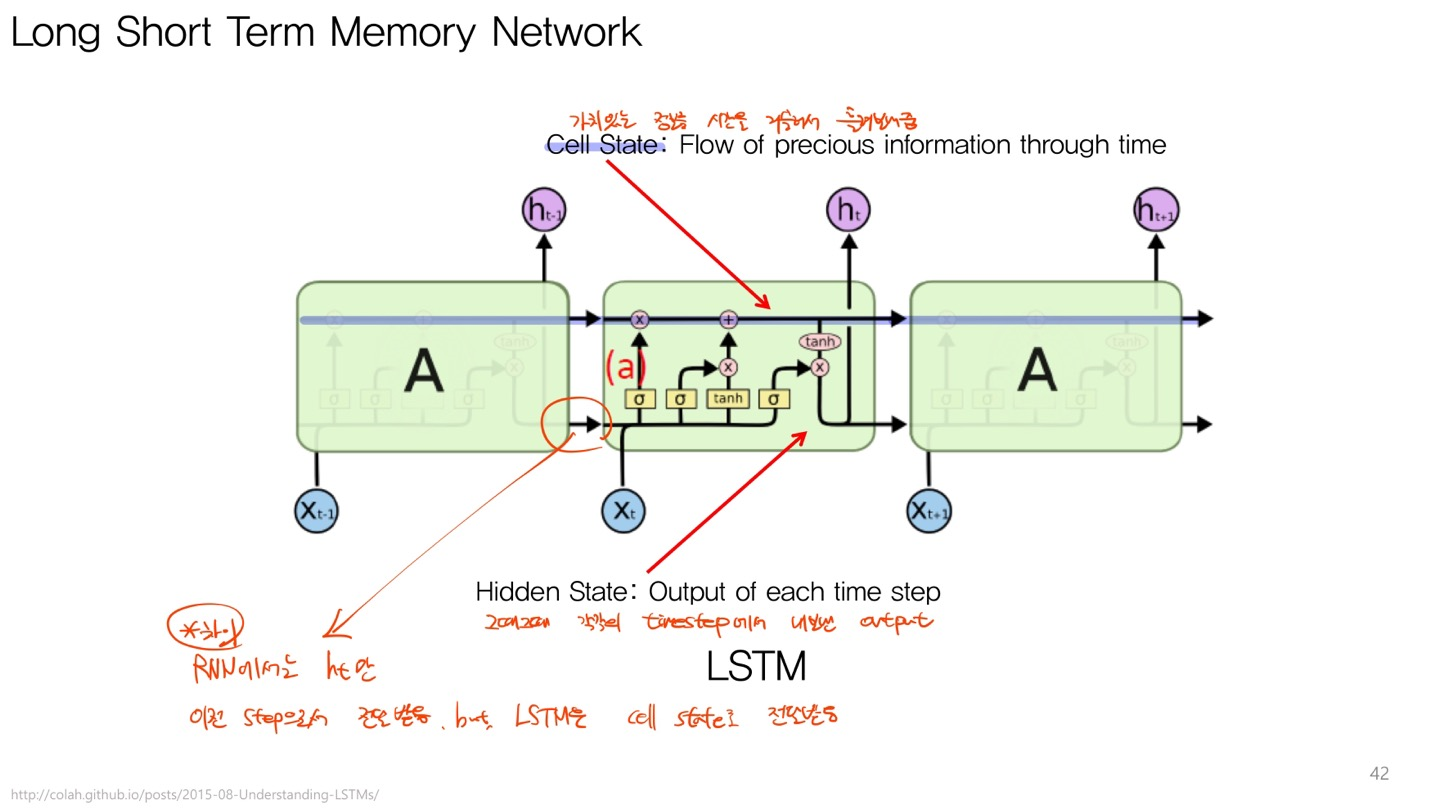

## Convolution layer

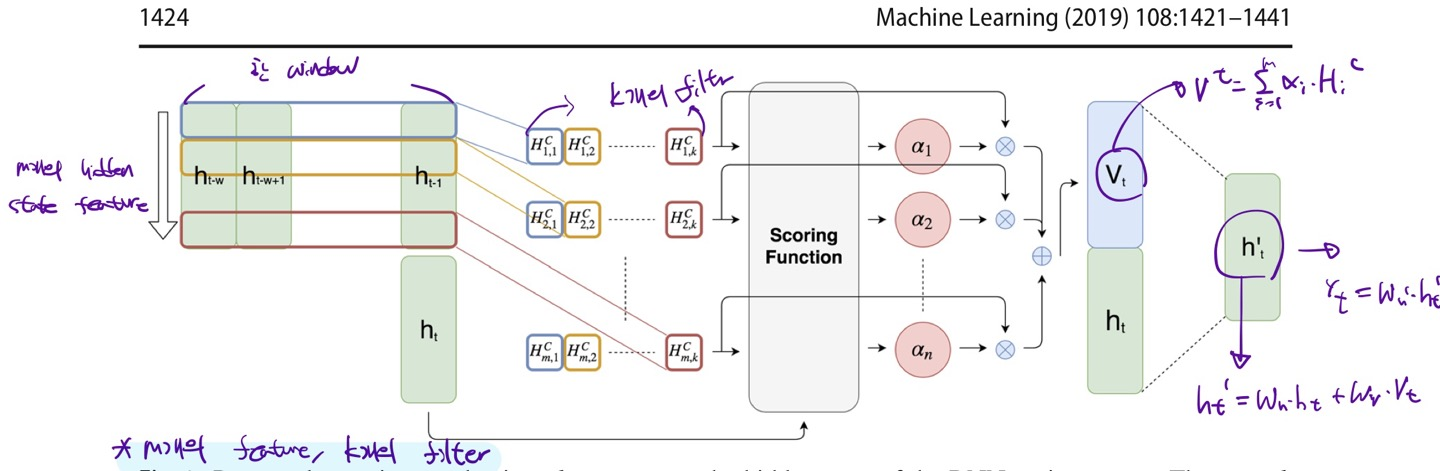

In [38]:
"""LSTM의 batch별+window별 hidden state를 가져와서 차원 변경"""
## hidden state들은 행 방향으로 convolution이 적용됨
output_realigned = lstm_hidden_states.permute(1, 0, 2).contiguous()
print('## 기존 lstm의 hidden state들의 shape       :', lstm_hidden_states.shape)
print('## permute 된 lstm의 hidden state들의 shape :', output_realigned.shape) # batch_size를 맨 앞으로 가져옴 [batch_size, window_size, n_features]

## 기존 lstm의 hidden state들의 shape       : torch.Size([168, 128, 12])
## permute 된 lstm의 hidden state들의 shape : torch.Size([128, 168, 12])


In [39]:
print('## 기존 hn의 shape       :', hn.shape)
hn = hn.permute(1, 0, 2).contiguous()
print('## permute 된 hn의 shape :', hn.shape) # batch_size를 맨 앞으로 가져옴

## 기존 hn의 shape       : torch.Size([1, 128, 12])
## permute 된 hn의 shape : torch.Size([128, 1, 12])


### 수정전

In [194]:
"""convolution에 넣기 위한 형태로 변형"""
print('## self_window_length :', self_window_length)
print('## self_hidden_state_features :', self_hidden_state_features)
print()
print('## output_realigned shape :', output_realigned.shape) # [batch_size, window_size, n_features]의 형태
input_to_convolution_layer = output_realigned.view(-1, 1, self_window_length, self_hidden_state_features) # convolution에 들어가기 위해서는 channel이 필요함 [batch_size, channels, window_size, n_features]
print('## input_to_convolution_layer의 shape :', input_to_convolution_layer.shape) # [batch_size, channels, window_size, n_features]

## self_window_length : 168
## self_hidden_state_features : 12

## output_realigned shape : torch.Size([128, 168, 12])
## input_to_convolution_layer의 shape : torch.Size([128, 1, 168, 12])


In [195]:
"""CNN layer"""
# nn.Conv1d(1, )에서 1은 in_channels이다.
# self.hidC = convolution filter의 개수
# self.Ck = cnn의 kernel size

self_hidC = args.hidCNN # 10개의 filter를 적용하여서 1개인 기존의 channel을 10개로 늘림
self_Ck = args.CNN_kernel
self_hidden_state_features = args.hidden_state_features

print('## self_hidC :', self_hidC)
print('## self_Ck :', self_Ck)
print('## self_hidden_state_features :', self_hidden_state_features)
self_compute_convolution = nn.Conv1d(1, self_hidC, kernel_size = (self_Ck, self_hidden_state_features)).cuda() # nn.Conv1d(1, 10, kernel_size=(1, 12))
self_compute_convolution

## self_hidC : 10
## self_Ck : 1
## self_hidden_state_features : 12


Conv1d(1, 10, kernel_size=(1, 12), stride=(1,))

In [196]:
convolution_output = F.relu(self_compute_convolution(input_to_convolution_layer))
print('## convolution을 거치기 전의 shape :', input_to_convolution_layer.shape)
print('## convolution을 거친 후의 shape :', convolution_output.shape)
# convolution_output = self.dropout(convolution_output)

## convolution을 거치기 전의 shape : torch.Size([128, 1, 168, 12])
## convolution을 거친 후의 shape : torch.Size([128, 10, 168, 1])


### 수정 후
- 각 feature의 window_size별로 convolution이 진행되어야 하는데 위의 코드는 window size의 feature 별로 convolution이 진행되고 있음

In [40]:
print('## output_realigned shape :', output_realigned.shape) # [batch_size, window_size, n_features]의 형태
# convolution에 들어가기 위해서는 channel이 필요함 [batch_size, channels, window_size, n_features]
# 그러나 이 tpa-lstm의 경우에는 row가 변수, column이 window_length가 되어서 lstm으로부터 나온 각 hidden feature의 window_length 별로 convolution이 이루어져야 한다.
input_to_convolution_layer = output_realigned.permute(0,2,1).unsqueeze(1) # [batch_size, channels, n_features, window_size]
print('## input_to_convolution_layer의 shape :', input_to_convolution_layer.shape) # [batch_size, channels, n_features, window_size]

## output_realigned shape : torch.Size([128, 168, 12])
## input_to_convolution_layer의 shape : torch.Size([128, 1, 12, 168])


In [41]:
"""CNN layer"""
# nn.Conv1d(1, )에서 1은 in_channels이다.
# self.hidC = convolution filter의 개수
# self.Ck = cnn의 kernel size

self_hidC = args.hidCNN # 10개의 filter를 적용하여서 1개인 기존의 channel을 10개로 늘림
self_Ck = args.CNN_kernel
self_hidden_state_features = args.hidden_state_features

print('## self_hidC :', self_hidC)
print('## self_Ck :', self_Ck)
print('## self_hidden_state_features :', self_hidden_state_features)
# kernel size 변경
self_compute_convolution = nn.Conv1d(1, self_hidC, kernel_size = (self_Ck, self_window_length)).cuda() # nn.Conv1d(1, 10, kernel_size=(1, 12))
self_compute_convolution

## self_hidC : 10
## self_Ck : 1
## self_hidden_state_features : 12


Conv1d(1, 10, kernel_size=(1, 168), stride=(1,))

In [42]:
convolution_output = F.relu(self_compute_convolution(input_to_convolution_layer))
print('## convolution을 거치기 전의 shape :', input_to_convolution_layer.shape)
print('## convolution을 거친 후의 shape :', convolution_output.shape)
# convolution_output = self.dropout(convolution_output)

## convolution을 거치기 전의 shape : torch.Size([128, 1, 12, 168])
## convolution을 거친 후의 shape : torch.Size([128, 10, 12, 1])


## Attention layer
- LSTM의 final hidden state와 CNN을 거친 hidden state 값들의 matrix multiplication 부분 -> `scoring function`
    - LSTM의 final hidden states : final_hn
    - CNN을 거친 후의 hidden states : final_convolution_output

In [43]:
## 카피 저자의 코드의 경우, squeeze한 상태를 보면 batch 별로 window_size마다 filter가 있는 것을 알 수 있다.
## 7.3.1의 수정 후가 맞는 것 같다.
print('## convolution_output의 기존 shape :', convolution_output.shape)
# 4차원을 3차원으로 변경
convolution_output = convolution_output.squeeze(3)
print('## convolution_output의 squeeze 후 shape :', convolution_output.shape) # [batch_size, hidden_channels, window_size]

## convolution_output의 기존 shape : torch.Size([128, 10, 12, 1])
## convolution_output의 squeeze 후 shape : torch.Size([128, 10, 12])


In [44]:
"""수정 전 : [10, 168]로 168개의 window들에 대한 10개 filter의 output 값이 나옴"""
"""수정 후(convolution 적용 부분 수정) : [10, 12]로 12개의 hidden_features들에 대한 10개 filter의 output 값이 나옴"""
convolution_output[0].shape

torch.Size([10, 12])

In [45]:
print('## self.hidC :', self_hidC) # convolution filter의 개수
print('## self_hidden_state_features :', args.hidden_state_features)
print()

## attention을 적용하기 위한 파라미터
## 수정 전의 기존의 코드는 convolution이 window 별로 이루어졌다.
self_attention_matrix = nn.Parameter(
                torch.ones(args.batch_size, self_hidC, self_hidden_state_features, requires_grad=True, device='cuda'))
print('## "self_attention_matrix"의 shape:', self_attention_matrix.shape)

## self.hidC : 10
## self_hidden_state_features : 12

## "self_attention_matrix"의 shape: torch.Size([128, 10, 12])


In [46]:
"""Matrix Multiplication을 할 때, padding을 진행하기 위한 부분"""
## final_hn : LSTM의 final_hidden_state를 scoring function과 곱하기 위해서 padding을 진행하는 부분
## final_convolution_output : LSTM의 hidden state matrix에 convolution을 진행한 후 나온 값으로 이후 weight를 곱하여 (scoring function을 진행하여) atttention weight가 반영된 Vt를 만들어낸다.
print('## self_attnetion_matrix.size(0) :', self_attention_matrix.size(0))
print('## self_hidden_state_features :', self_hidden_state_features)
print()
## final hidden state
final_hn = torch.zeros(self_attention_matrix.size(0), 1, self_hidden_state_features)
print('## final_hn :', final_hn.shape)

## final convolution output
final_convolution_output = torch.zeros(self_attention_matrix.size(0), self_hidC, self_hidden_state_features) # 기존 코드는 self_hidden_state_features가 아닌 self_window_length임. convolution을 수정했을 때는 다음과 같은 형태가 맞음
print('## final_convolution_output :', final_convolution_output.shape)

## self_attnetion_matrix.size(0) : 128
## self_hidden_state_features : 12

## final_hn : torch.Size([128, 1, 12])
## final_convolution_output : torch.Size([128, 10, 12])


In [47]:
## hn : lstm에서 나온 최종 hidden_state로 [1, 128, 12]의 형태를 가짐 (1, batch_size, lstm_hidden_features) -> 1은 최종 값이기에 1
print('## hn의 shape :', hn.shape)
print('## convolution_output의 shape :', convolution_output.shape)

diff = 0
## 첫 부분은 batch_size별로 묶었을 때의 마지막 batch를 위한 부분 128씩 묶었을 때, 데이터가 부족하여 21개만 묶일 수 있다.
if (hn.size(0) < self_attention_matrix.size(0)): # hn의 0차원 값 (batch_size)이 self_attention_matrix의 0차원 값(batch_size) 보다 작다면
    # final_hn과 final_convolution_output은 모두 128의 크기로 되어있다.
    # 마지막 batch 묶음이 128개가 되지 않는다면 나머지는 0으로 padding 처리
    final_hn[:hn.size(0), :, :] = hn 
    final_convolution_output[:convolution_output.size(0), :, :] = convolution_output
    diff = self_attention_matrix.size(0) - hn.size(0)
## 128개의 batch가 모두 온전하게 들어있는 경우 그대로 설정
else:
    final_hn = hn
    final_convolution_output = convolution_output

## hn의 shape : torch.Size([128, 1, 12])
## convolution_output의 shape : torch.Size([128, 10, 12])


In [48]:
print('## final_hn shape :', final_hn.shape) # [batch_size, lstm_최종_layer(1), lstm_hidden_features]
print('## final_convolution_output shape :', final_convolution_output.shape) # [batch_size, convolution_filters, window_size] -> CNN 수정전

## final_hn shape : torch.Size([128, 1, 12])
## final_convolution_output shape : torch.Size([128, 10, 12])


### Calculate the attention score

In [49]:
final_hn_realigned = final_hn.permute(0, 2, 1).contiguous()
final_hn_realigned = final_hn_realigned.cuda()
convolution_output_for_scoring = final_convolution_output.permute(0, 2, 1).contiguous()
convolution_output_for_scoring = convolution_output_for_scoring.cuda()

print('## 기존의 final_hn shape :', final_hn.shape)
print('## permute 후의 final_hn의 shape :', final_hn_realigned.shape) ## [batch_size, lstm의_최종_layer_차원(1), hidden_feature_size] -> [batch_size, hidden_feature_size, lstm의_최종_layer_차원(1)]
print()
print('## 기존의 final_convolution_output의 shape :', final_convolution_output.shape)
print('## permute 후의 final_convolution_output의 shape :', convolution_output_for_scoring.shape) ## [batch_size, CNN_filters, window_size] -> [batch_size, window_size, CNN_filters]

## 기존의 final_hn shape : torch.Size([128, 1, 12])
## permute 후의 final_hn의 shape : torch.Size([128, 12, 1])

## 기존의 final_convolution_output의 shape : torch.Size([128, 10, 12])
## permute 후의 final_convolution_output의 shape : torch.Size([128, 12, 10])


In [50]:
print('## convolution_output_for_scoring의 shape :', convolution_output_for_scoring.shape)
print('## self_attention_matrix의 shape :', self_attention_matrix.shape) # 업데이트 되는 weight
print()

## convolution output(H_i_C와) attention weight를 구하기 위한 가중치를 곱한 값
mat1 = torch.bmm(convolution_output_for_scoring, self_attention_matrix).cuda()
print('## mat1의 shape :', mat1.shape)

## convolution_output_for_scoring의 shape : torch.Size([128, 12, 10])
## self_attention_matrix의 shape : torch.Size([128, 10, 12])

## mat1의 shape : torch.Size([128, 12, 12])


In [51]:
## 위에서 곱한 mat1과 padding을 적용한 LSTM의 마지막 layer를 곱한 값
## 이후 sigmoid를 취하면 -> 최종 attention weight가 구해진다.

print('## final_hn_realigned의 shape :', final_hn_realigned.shape)
scoring_function = torch.bmm(mat1, final_hn_realigned)
alpha = torch.sigmoid(scoring_function) # scoring function에 sigmoid를 취하기
print('## alpha :', alpha.shape)

## final_hn_realigned의 shape : torch.Size([128, 12, 1])
## alpha : torch.Size([128, 12, 1])


In [52]:
## 위에서 구한 최종 attention weight와 convolution을 통해 나온 output을 곱하면 context vector (Vt)가 구해진다.
context_vector = alpha*convolution_output_for_scoring
context_vector = torch.sum(context_vector, dim=1) # batch 내의 모든 window 별 값을 행별로 sum
print('## context_vector :', context_vector.shape)

## context_vector : torch.Size([128, 10])


### h't를 만들기 위해 matrix multiplication을 진행하는 부분

In [53]:
"""마지막 예측을 위한 부분"""
print('## self_hidC :', args.hidCNN) # CNN filter의 개수
context_vector = context_vector.view(-1, self_hidC, 1)
print()

self_final_state_matrix = nn.Parameter(torch.ones(args.batch_size, self_hidden_state_features, self_hidden_state_features, requires_grad=True)).cuda()
self_context_vector_matrix = nn.Parameter(torch.ones(args.batch_size, self_hidden_state_features, self_hidC, requires_grad=True, device='cuda'))

print('#### 최종 output을 위한 1번 matrix multiply (LSTM의 최종 hidden state인 ht)')
print('## self_final_state_matrix :', self_final_state_matrix.shape)
print('## final_hn_realigned :', final_hn_realigned.shape)
print()
print('#### 최종 output을 위한 2번 matrix multiply (convolution 된 결과에 scoring function을 적용한 Vt)')
print('## self_context_vector_matrix :', self_context_vector_matrix.shape)
print('## context_vector :', context_vector.shape)
print()

# lstm의 final hideen_state와 weight_1을 곱하고, attention을 적용한 context vector(Vt)와 weight_2를 곱하여 h't를 만들어 낸다.
h_intermediate = torch.bmm(self_final_state_matrix, final_hn_realigned) + torch.bmm(self_context_vector_matrix, context_vector)
print('## h_intermediate :', h_intermediate.shape)

## self_hidC : 10

#### 최종 output을 위한 1번 matrix multiply (LSTM의 최종 hidden state인 ht)
## self_final_state_matrix : torch.Size([128, 12, 12])
## final_hn_realigned : torch.Size([128, 12, 1])

#### 최종 output을 위한 2번 matrix multiply (convolution 된 결과에 scoring function을 적용한 Vt)
## self_context_vector_matrix : torch.Size([128, 12, 10])
## context_vector : torch.Size([128, 10, 1])

## h_intermediate : torch.Size([128, 12, 1])


### tpa-lstm의 final output

In [54]:
# 최종 h't에다가 weight를 고밯여 최종 output을 생성한다.
    # self.final_matrix는 파라미터를 의미한다.
self_final_matrix = nn.Parameter(torch.ones(args.batch_size, self_original_columns, self_hidden_state_features, requires_grad=True, device='cuda'))
print('## self_final_matrix :', self_final_matrix.shape)
print('## h_intermediate :', h_intermediate.shape)
print()

result = torch.bmm(self_final_matrix, h_intermediate)
print('## 기존의 result shape :', result.shape)
result = result.permute(0, 2, 1).contiguous()
print('## permute 된 result shape :', result.shape)
result = result.squeeze()
print('## 최종 result shape :', result.shape)

## self_final_matrix : torch.Size([128, 8, 12])
## h_intermediate : torch.Size([128, 12, 1])

## 기존의 result shape : torch.Size([128, 8, 1])
## permute 된 result shape : torch.Size([128, 1, 8])
## 최종 result shape : torch.Size([128, 8])


In [55]:
## padding을 한 부분 제외
    # 마지막 batch에 해당할 듯 (batch_size에 맞지 않는 batch에 해당)
final_result = result[:result.size(0) - diff]
print('## final_result :', final_result.shape)

## final_result : torch.Size([128, 8])


In [56]:
final_result[0]

tensor([58.1679, 58.1679, 58.1679, 58.1679, 58.1679, 58.1679, 58.1679, 58.1679],
       device='cuda:0', grad_fn=<SelectBackward>)

## AR module

In [57]:
# if (self_hw >0):
#     z = x[:, -self_hw:, :];
#     z = z.permute(0, 2, 1).contiguous().view(-1, self_hw);
#     z = self_highway(z);
#     z = z.view(-1, self_original_columns);
#     res = final_result + z;

In [58]:
self_hw = args.highway_window
print('## self_hw :', self_hw)
print()
self_highway = nn.Linear(self_hw, 1).cuda()
self_highway

## self_hw : 24



Linear(in_features=24, out_features=1, bias=True)

In [59]:
print('## original X의 shape :', X.shape)
print('## 모든 batch의 변수 별로 마지막 24개의 값을 가져옴 :', X[:, -self_hw:, :].shape)

## original X의 shape : torch.Size([128, 168, 8])
## 모든 batch의 변수 별로 마지막 24개의 값을 가져옴 : torch.Size([128, 24, 8])


In [60]:
z = X[:, -self_hw:, :]
z = z.permute(0, 2, 1).contiguous().view(-1, self_hw) # 각 행은 변수 하나의 self_hw 만큼의 값을 의미한다. 
print('## z의 shape :', z.shape)

## z의 shape : torch.Size([1024, 24])


In [61]:
X[:, -self_hw:, :][0].shape

torch.Size([24, 8])

In [62]:
z[0].shape

torch.Size([24])

In [63]:
z = self_highway(z)
print('## Linear layer를 거친 뒤의 z :', z.shape)

## Linear layer를 거친 뒤의 z : torch.Size([1024, 1])


In [64]:
print(z[0:8])
print(z[8:16])

tensor([[0.3153],
        [0.7197],
        [0.3341],
        [0.3045],
        [0.0938],
        [0.0201],
        [0.2452],
        [0.2203]], device='cuda:0', grad_fn=<SliceBackward>)
tensor([[0.3210],
        [0.7306],
        [0.3362],
        [0.3083],
        [0.0938],
        [0.0201],
        [0.2515],
        [0.2219]], device='cuda:0', grad_fn=<SliceBackward>)


In [65]:
z.view(-1, self_original_columns)[1]

tensor([0.3210, 0.7306, 0.3362, 0.3083, 0.0938, 0.0201, 0.2515, 0.2219],
       device='cuda:0', grad_fn=<SelectBackward>)

In [66]:
## (1024, 1) -> (128, 8)로 바뀐다.
# (1024, 1)에서 1~8번째 행은 1~8변수를 의미
# (1024, 1)에서 9~16째 행은 1~8변수를 의미
# (128, 8)로 바뀌면 (1024, 1)의 1~8번째 행이 (128, 8)의 첫 번째 행으로 바뀐다.
# 이후 (1024, 1)의 9~16번째 행이 (128, 8)의 두 번째 행으로 바뀐다.
z = z.view(-1, self_original_columns)
print(z.shape) # batch별 변수의 output 값

torch.Size([128, 8])


In [67]:
## 최종 결과값
res = final_result + z
print('## res :', res.shape)

## res : torch.Size([128, 8])


In [68]:
res

tensor([[58.4832, 58.8876, 58.5021,  ..., 58.1880, 58.4131, 58.3883],
        [58.5813, 58.9909, 58.5965,  ..., 58.2804, 58.5118, 58.4821],
        [58.5939, 59.0129, 58.6115,  ..., 58.2933, 58.5220, 58.4958],
        ...,
        [63.9575, 64.3575, 63.9862,  ..., 63.6750, 63.8898, 63.8816],
        [63.9732, 64.3846, 64.0019,  ..., 63.6913, 63.9050, 63.8988],
        [63.8863, 64.2848, 63.9177,  ..., 63.6077, 63.8205, 63.8127]],
       device='cuda:0', grad_fn=<AddBackward0>)

In [69]:
torch.sigmoid(res)[0]

tensor([1., 1., 1., 1., 1., 1., 1., 1.], device='cuda:0',
       grad_fn=<SelectBackward>)